<img src="../figuras/logos/logo_usc.jpg" align=right width='80px'/>
<br>

<table width="100%">
<td style="font-size:40px;font-style:italic;text-align:left;background-color:rgba(0, 220, 170,0.7)">
Circuitos para computación clásica 
</td></table>



$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\mathbb H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $

In [4]:
import sys
sys.path.append('../')
import macro_tQ as tQ

import numpy as np
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex

# Computación clásica universal 

En computación clásica, la únidad de información es el bit, una variable entersa $x = 0,1 \in {\mathbb Z}_2$. Las puertas lógicas elementales son, 
- sobre un bit, la puerta NOT $x\to \neq x = x\oplus 1$, 

- sobre dos bits las puertas AND, OR, XOR, y NAND 
<br>
$$
\begin{array}{|c|c|c|c|c|}
\hline x,y & \hbox{AND} ~ (x\land y)  & \hbox{OR} ~  (x \lor y) & \hbox{XOR} ~ (x\oplus y) & \hbox{NAND} ~ \neg(x\land y)\\
\hline 00 & 0 &  0 &   0 & 1 \\
\hline 01 & 0 &  1 &  1 & 1\\
\hline 10 & 0 &  1 &  1 & 1\\
\hline 11 & 1 &  1 &  0 & 0 \\
\hline 
\end{array}
$$

<br>
<br>

<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
    <b>Teorema:</b> (<i> Computación clásica universal</i>) 
<br>
<br>
cualquier función
<br>$$
f : \{0,1\}^n \to \{0,1\}^m
$$
<br> puede construirse mediante una concatenación de puertas elementales NOT, AND, OR y XOR.
</div>



<br>
Surge la cuestión acerca de si la computación cuántica podrá contendrá la clásica actuando sobre simples cúbits $\{\ket{0},\ket{1}\}$ (sin superposiciones)

Por ejemplo: la puerta clásica NOT es idéntica a las puerta cuántica X

$$
X\ket{x} \to \ket{\neg x}
$$


 

Con respecto a las operaciones sobre *dos bits*, nos encontramos con una
dificultad: 

- las puertas cuánticas son unitarias y, por tanto, reversibles. 

- pero las puertas clásicas son funciones del espacio de 2 bits a 1 bit. Por esta razón, *ninguna de estas operaciones es invertible*

Sin embargo si mantenemos memoria del primer registro, $x$ la función XOR se vuelve invertible
<br>

$$ \hbox{XOR} : ( 00,01,10,11) \to  (00, 01, 11, 10 )$$

No así las demás, que necesitan incluir un bit extra (auxiliar).   


Este formalismo, denominando, *computación clásica reversible* es una rama de la computación clásica. 

<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Teorema:</b> 
todas las puertas lógicas clásicas  NOT, AND, OR, XOR  y   NAND admiten una implementación en un circuito cuántico en términos de  la puerta de Toffoli (CCNOT)
</div>


- La implementación de $\hbox{NOT}$
<br>
<br>
$$
\hbox{NOT}   ~\to~  {\rm CCNOT} \ket{1,1,x} = \ket{1,1,\neg x }
$$
<br>
 es inmediata porque ${\rm CCNOT}$ aplicado a $\ket{1,1,x}$ necesariamente actúa como $X$ en el tercer bit. 

-  La implementación de $\hbox{AND}$ 
<br>
<br>
$$  
\hbox{AND}  ~\to~ {\rm CCNOT} \ket{x,y,0} = \ket{x,y, x  \land y} 
$$
<br>
es directamente la acción de la puerta CCNOT

- La implementación de $\hbox{OR}$ se basa en el *teorema de Morgan*:
$
x\lor y = \neg(\neg x\land \neg y)\, .
$ De esta manera
<br>
<br>
<br>
$$
{\rm OR} ~\to~  (X\otimes X\otimes X){\rm CCNOT} (X\otimes X \otimes I) \ket{x,y,0} = \ket{x,y, x \lor y}
$$
<br>
<br>
y el producto de operadores ejecuta la instrucción indicada en el miembro de la derecha.


- La implementación de $\hbox{XOR}$ se basa en que, actuando sobre $\ket{1, x, y}$ ${\rm CCNOT}$ se reduce a ${\rm CNOT}$ actuando sobre $\ket{x,y}$, que es precisamente $\ket{x,x\oplus y}$.
<br>
<br>
$$
{\rm XOR} ~\to~ {\rm CCNOT} \ket{1,x,y} = \ket{1,x, x \oplus y}
$$
<br>
 


<br>
<br>

- La implementación de $\hbox{NAND}$ 
<br>

$$
{\rm NAND} ~\to~  (I\otimes I\otimes X) {\rm CCNOT}  \ket{x,y, 0} =  \ket{x,y, \neg (x \land y)}  
$$
<br>



# Preparación de un estado inicial


Muchos algoritmos cuánticos se necesitan la preparación de un estado inicial adecuado

$$
U : \ket{0} \to  \sum_{i=0}^{2^n-1} c_i\ket{i}
$$



Separemos las amplitudes complejas en módulo y fase $c_i = a_i e^{\gamma_i}$ donde $a_i = |c_i|$.  


Veamos el caso $n=2$. El circuito que nos permite preparar un estado genérico es el siguiente




<br>
<figure><center>
<a id='fig_ref'></a>
<img src="images/preparestatecircuit.png" align=center width='60%'/>
<center></center>
</center></figure>
<br>
donde 
$$
R_y(\theta) = \begin{bmatrix} \cos\displaystyle\frac{\theta}{2} & -\sin\displaystyle\frac{\theta}{2} \\
 \sin\displaystyle\frac{\theta}{2}  & \cos\displaystyle\frac{\theta}{2} \end{bmatrix}~~~~, ~~~~~
D(\gamma_i,\gamma_j ) = \begin{bmatrix} e^{i\gamma_i} & 0 \\ 0 & e^{i\gamma_j} \end{bmatrix} = K(\gamma_i) P(\gamma_j-\gamma_i)
$$

El estado en la barrera, será

\begin{eqnarray}
\ket{\psi_0}~~ &=&~~ \cos\theta_1 \ket{0}\otimes \big( \cos\theta_2 \ket{0} + \sin\theta_2\ket{1}\big) + \sin\theta_1\ket{1}\otimes \big(\cos\theta_3\ket{0} + \sin\theta_3\ket{1}\big) \nonumber \\&=& ~~ \cos\theta_1 \cos\theta_2 \ket{00} + \cos\theta_1\sin\theta_2\ket{01} + \sin\theta_1\cos\theta_3\ket{10} + \sin\theta_1\sin\theta_3\ket{11} \rule{0mm}{8mm}
\end{eqnarray}


de donde obtenemos cuatro ecuaciones para cuatro incógnitas

\begin{eqnarray}
a_1 &=& \cos\theta_1 \cos\theta_2 \nonumber\\ \rule{0mm}{6mm}
a_2 &=&  \cos\theta_1\sin\theta_2\nonumber\\  \rule{0mm}{6mm}
a_3 &=&  \sin\theta_1\cos\theta_3\nonumber\\  \rule{0mm}{6mm}
a_4 &=& \sqrt{1-a_1^3-a_2^2-a_3^2} \rule{0mm}{6mm}
\end{eqnarray}

sólo necesitamos 3 ángulos para representar 4 amplitudes debido a la ligadura $\sum_i a_i^2 = 1$.


Una vez fijadas las amplitudes, la última parte del circuito es equivalente al  operador unitario

$$
U= \begin{bmatrix} e^{i\gamma_1} & 0 & 0 & 0 \\ 0 & e^{i\gamma_2} & 0 & 0 \\ 0 & 0 & e^{i\gamma_3} & 0 \\ 0 & 0 & 0 & e^{i\gamma_4} \end{bmatrix}=\begin{bmatrix} K(\gamma_1)P(\gamma_2-\gamma_1) & 0 \\ 0 &K(\gamma_3) P(\gamma_4-\gamma_3) \end{bmatrix}  =\ket{0}\bra{0}D(\gamma_1,\gamma_2) + \ket{1}\bra{1}D(\gamma_3,\gamma_4)  
$$


<div class="alert alert-block alert-success">
    <b>Ejercicio 1.3.2.1</b> 

    
Diseña el circuito que inicializa un estado genérico de $n=3$ cúbits. Úsalo para introducir el estado
<br>    
$$
\ket{\psi} = \frac{1}{4}\left( \rule{0mm}{5mm} \ket{000}-3\ket{001}-\ket{010} +2\ket{110}-\ket{111} \right)
$$
</div>



Evidentemente este circuito no puede ser eficiente puesto que es necesario ajustar un número $2*2^n$ de parámetros.
<br>
<br>

En algunos casos, sí que es posible encontrar un circuito eficiente. 
<br>
<br>
Por ejemplo el estado inicial que es una superposición homogénea de elementos de la base

$$
\ket{\psi} = W \ket{0}  = \ket{+}^{\otimes n}= \frac{1}{\sqrt{n}}\sum_{i=1}^{2^n-1} \ket{i}
$$

se obtiene con un circuito de  **coste** = $n~$  y $~$ **profundidad**=1

# Funciones digitales


**Motivación:**

Una clase de problemas en los que la computación cuántica promete alcanzar una ventaja con respecto a la clásica se denominan  <i>algoritmos de interrogación de oráculo</i>

Involucra la clasificación funciones clásicas según propiedades escogidas de un cuerto conjunto 

Genéricamente, como el propio conjunto de funciones,  se trata de un problema de complejidad NP

<br>




- Estas  *funciones clásicas* son cajas negras llamadas **oráculos** que sólo podemos *invocar* tantas veces como se desee.

<br>

- El conjunto de *clases* al que, *a priori* pueden pertenecer ser denominan **promesas**
<br>

<br>
<br>
Para poner a prueba un algoritmo de interrogación de oráculo es necesario construirlos aunque serán secretos para el usuario. 

<br>

**Funciones digitales**

Un proceso de computación clásica descompone en puertas elementales una _función digital_ 
<br>
<br>

$$
f : \{0,1\}^n ~~\to ~~\{0,1\}^m
$$

<br>

<br>

La construcción de $f$ es equivalente a la especificación de $m$ funciones  $f_1,f_2,...,f_m$ **binarias**
<br>
<br>

$$
f_i : \{0,1\}^n ~~\to ~~\{0,1\}
$$ 
<br>

Es evidente que ninguna función binaria es invertible para $m\geq 2$. 

<br>



Si queremos englobar la computación clásica dentro de la cuántica, este hecho representa un inconveniente, debido a que los circuitos cuánticos son, por naturaleza, invertibles. 



<br>

La manera más simple de fabricar, a partir de un mapa no invertible $f$, otro invertible $U_f$, implica *conservar* los valores de la variables iniciales 



Para $f:\{0,1\}^n \to \{0,1\}$ necesitamos un total de $n+1$ cúbits:

- $n$ cúbits que contienen el argumento de la función, $\ket{x}_n \in \mathbb{C}^n$, 

- 1 cúbit que guardará el resultado, $\ket{y} \in \mathbb{C}$.


Sea $U_f$ el siguiente operador

\begin{equation}
U_f : \ket{x}\ket{y} \longrightarrow \ket{x} \ket{ y \oplus f(x) }
\end{equation}

Donde $\oplus$ indica suma módulo 2. 

Es evidente de la definición que $U_f\cdot U_f = I$. 

## Construcción de funciones binarias. Los min-términos

Es muy sencillo establecer un método general para construir funciones binarias de la forma $f: \{0, 1\}^n \rightarrow \{0, 1\}$. 

Consideremos la siguiente tabla de verdad para una función $f: \{0, 1\}^3 \rightarrow \{0, 1\}$ concreta.
<br>

$$
\begin{array}{||c|c|c||c||}
\hline
  x_2 & x_1 & x_0 &   f(x) \\  \hline\hline
      0 & 0 & 0 &  0  \\ \hline
 0& 0 & 1 & 1   \\ \hline
 0& 1 & 0 & 0   \\ \hline
 0& 1 & 1 & 0   \\ \hline
 1& 0 & 0 & 0   \\ \hline
 1& 0 & 1 & 1   \\ \hline
 1& 1 & 0 & 0   \\ \hline
 1& 1 & 1 & 1   \\ \hline
\end{array}
$$


La idea es considerar exclusivamente los términos que tienen como salida la variable 1, que denominaremos <b>min-términos</b>. 

Por ejemplo hay un min-término de la forma $101 \to 1$ que se puede obtener mediante una puerta como la siguiente

<br>
<br>
<div>
<img src="images/ctrl5.png" width="10%" style="margin:auto"/>
</div>
<br>

Cada min-término llevará asociada una puerta condicionada diferente. Su composición define la función $f$

Para el caso de la tabla de verdad anterior, el circuito correspondiente vendrá dado por:

In [ ]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.circuit.library import MCXGate

qr = QuantumRegister(4)
cr = ClassicalRegister(4)

qc = QuantumCircuit(qr, cr, name='q')

qc.append(MCXGate(3, ctrl_state=1), qr)
qc.append(MCXGate(3, ctrl_state=5), qr)
qc.append(MCXGate(3, ctrl_state=7), qr)

qc.draw(output='mpl')

donde hemos hecho uso de la puerta multicontrolada [MCXGate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.MCXGate.html?highlight=mcxgate#qiskit.circuit.library.MCXGate) de qiskit

Vamos a implementar una función $f:\{0,1\}^4\to \{0,1\}^4$ dada por la siguiente *tabla de verdad* 

<br>
$$
\begin{array}{|c|c || c | c | }
\hline
x & f(x) & & x & f(x) \\  \hline
0000 & 1111 && 1000 & 0101 \\ \hline
0001 & 1011 && 1001 & 0100 \\ \hline
0010 & 0011 && 1010 & 0000 \\ \hline
0011 & 1000 && 1011 & 1110 \\ \hline
0100 & 0101 && 1100 & 1111 \\ \hline
0101 & 0100 && 1101 & 1011 \\ \hline
0110 & 0000 && 1110 & 0011 \\ \hline
0111 & 1110 && 1111 & 1000 \\ \hline
\hline
\end{array}
$$

In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import MCXGate


def oracle(f_outputs): 
    
    n = int(np.log2(len(f_outputs)))  #dimension del registro de entrada |x> 
    m = len(f_outputs[0])             #dimension del registro de salida |f(x)>
    
    #generamos todos los posibles inputs en binario, completando con ceros hasta tener strings de n bits
    inputs = [format(i, 'b').zfill(n) for i in range(2**n)]
    print(inputs)
    
    qr_input = QuantumRegister(n, name='input')
    qr_output = QuantumRegister(m, name='output')
    qc = QuantumCircuit(qr_input, qr_output)


    # Hacemos un bucle sobre los inputs
    for i,input_str in enumerate(inputs):
        ctrl_state= int(input_str[::],2)
        # Para cada input, i, haz un bucle sobre cada bit del output     
        for j,output_bit in enumerate(f_outputs[i]):
            if output_bit =='1':
                qc.append(MCXGate(len(input_str), ctrl_state=ctrl_state),qr_input[:]+[qr_output[n-j-1]])  

    return qc

['000', '001', '010', '011', '100', '101', '110', '111']


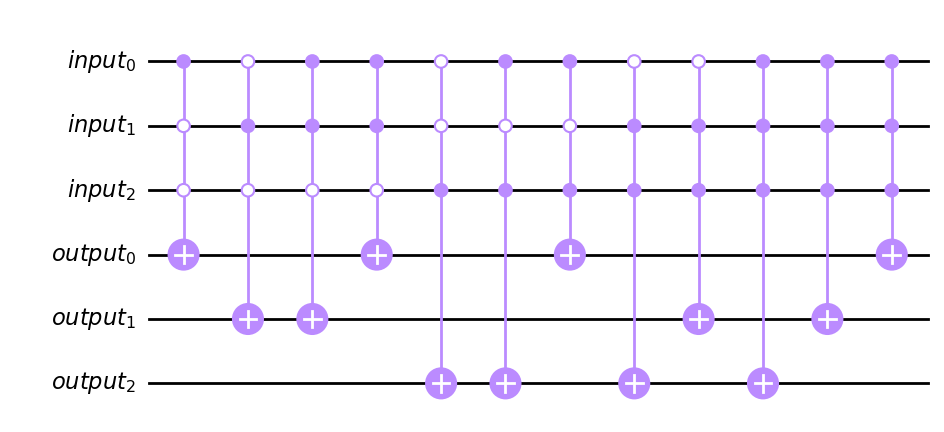

In [49]:
f_outputs = ['1111', '1011', '0011', '1000', '0101', '0100', 
               '0000', '1110', '0101', '0100', '0000', '1110', 
               '1111', '1011', '0011', '1000']

f_outputs= ['000', '001', '010', '011', '100', '101', '110', '111']
    
oracle(f_outputs).draw('mpl')

['000', '001', '010', '011', '100', '101', '110', '111']


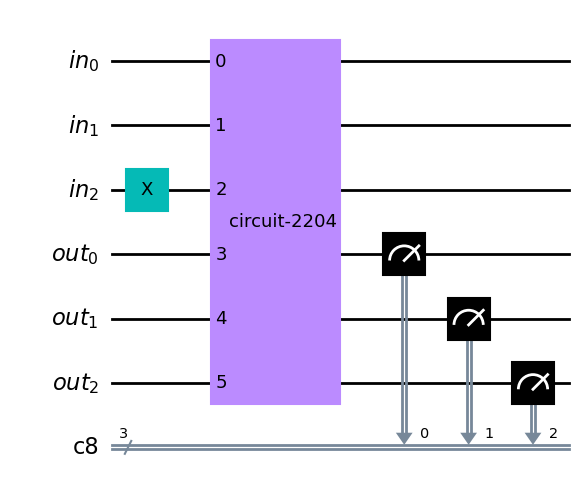

In [89]:
n=3
qr_in = QuantumRegister(n, name='in')
qr_out = QuantumRegister(n, name='out')
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr_in,qr_out,cr)


qc.x(2)
qc.append(oracle(f_outputs),qr_in[:]+qr_out[:])
qc.measure(qr_out,cr)

qc.draw('mpl')

In [90]:
from qiskit.primitives import Sampler

counts = Sampler().run(qc,shots=1).result().quasi_dists[0]

for keys,values in counts.items():
    print("{0:b}".format(keys),values)

100 1.0


<div class="alert alert-block alert-success">
    <b> Ejercicio 1.3.2.2 </b>
       
Escribe una función $f:S^n\to S$  que  produzca aleatoriamente $f(x) = \pm 1$ de forma <i>equilibrada</i> (es decir, tantos $f(x)= +1$ como $f(x)= -1$). 


<details>
<summary><p style='text-align:right'> >> Solución </p></summary>
Ver por ejemplo la solución del qiskit textbook:https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html   sección 4.4 
</details>

</div>


## Funcion binaria lineal: 

Dados dos n-tuplas binarias $x=(x_{n-1},\ldots,x_0)$ y $a=(a_{n-1},\ldots,a_0)$ definimos la **función lineal**
<br>
        
\begin{equation}
f(x;a) = a \cdot x = a_{n-1} x_{n-1} \oplus a_{n-2} x_{n-2} \oplus \cdots \oplus a_{0} x_{0}\; ,
\end{equation}

<br>
donde  $\oplus$ es la suma módulo 2.


Por ejemplo, el circuito que implementa esta función cuando $a=11010$ es el siguiente

<br>
<br>

<div>
<img src="images/linear_function.png" width="35%" style="margin:auto"/>
</div>
<br>


<div class="alert alert-block alert-success">
    <b> Ejercicio 1.3.2.3 </b>
       

 Completa el siguiente código que genera el circuito asociado a la función binaria lineal $f(x;a)$. 
    
    
<details>
<summary><p style='text-align:right'> >> Solución </p></summary>
    
    for i, aq in enumerate(reversed(a)):
        if aq == '1':
             qc.cx(qr_in[i],qr_out) 

</details>
</div>


In [ ]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister

def linear_circuit(x,a):
       
    assert(len(x)==len(a))

    # Inicialización de los registros
    qr_in = QuantumRegister(len(a), name='qr_in')
    qr_out = QuantumRegister(1, name='qr_out')
    cr = ClassicalRegister(1, name='cr')  
    qc = QuantumCircuit(qr_in, qr_out, cr, name='q_linear')
    
    'inicializamo el estado x '
    for i, xq in enumerate(reversed(x)):  # ojo con la ordenación de qiskit, por eso está reversed()
        if xq == '1':
             qc.x(qr_in[i]) 

    qc.barrier()

    'codificamos la función lineal x.a '
###
#
#        Tu solución aquí
#
#
####
            
    qc.barrier()
    qc.measure(qr_out[0],cr[0])
    
    return qc 

Veamos un ejemplo

In [ ]:
a = '1011'
x = '1001'

qc=linear_circuit(x,a)
qc.draw('mpl')

La función $a\cdot x = (1 + 0 + 0 + 1)mod(2) = 0$. Vamos a ver si este resultado es el hallado

In [ ]:
from qiskit import Aer, execute
n_tiradas = 1

M_backend = Aer.get_backend('qasm_simulator')
counts     = execute(qc, M_backend, shots = n_tiradas).result().get_counts()

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

<div class="alert alert-block alert-success">
    <b> Ejercicio 1.3.2.4</b>

sea sobre el conjunto de valores $x\in \{0,1,2,3\}$ la función $f(x) = x^2$. Halla la tabla de verdad en binario y construye el oráculo que implementa esta función.
    
</div>

# Oráculos <i> booleanos </i> y de fase

En la sección anterior hemos definido el operador  $U_f$ usando un cúbit ancilla

<br>

$$
U_f \ket{x}\otimes\ket{y} = \ket{x}\ket{y + f(x)}
$$

<br>

Podemos usar $U_f$ de 2 maneras distintas para *codificar el oráculo* de una función binaria $f(x)$


## Oráculo *booleano*

<br>

$$
U_f \ket{x}\otimes\ket{0} = \ket{x}\ket{f(x)}
$$
<br>

<div class="alert alert-block alert-danger">
<p style="text-align: center;"> <p style="text-align: left  ">  
    
- especificando $\ket{y}=\ket{0}$ codificamos la función $f(x)$  en el *estado del segundo cúbit*
<br>
<br>
- oráculos basados en esta codificación se denominan **oráculos booleanos**
</div>

## Oráculo de fase

<br>

Nada nos impide inicializar la ancilla en un *autovector* de $U_f$


<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Teorema:</b>  los autovectores de $U_f$ son los estados $\ket{x}\otimes \ket{\pm}$ 
</div>


*Prueba:*

Por un lado sabemos que los *autovalores* deben ser $\pm 1$ dado que $U_f^2 = I$. 
Veamos cada caso

\begin{eqnarray}
U_f\ket{x}\otimes \ket{+} &=& \ket{x}\otimes \frac{1}{\sqrt{2}}\left( \rule{0mm}{6mm}\ket{0\oplus f(x)}+\ket{1\oplus f(x)} \right) = \ket{x}\otimes \ket{+} \nonumber\\
U_f\ket{x}\otimes \ket{-} &=& \ket{x}\otimes \frac{1}{\sqrt{2}}\left( \rule{0mm}{6mm} \ket{0\oplus f(x)}-\ket{1\oplus f(x)}\right) = (-1)^{f(x)} \ket{x}\otimes \ket{-}
\end{eqnarray}

donde vemos que se produce un típico efecto de *retroceso de fase*


<div class="alert alert-block alert-danger">
<p style="text-align: center;"> <p style="text-align: left  ">  
<b>En resumen:</b>

-  especificando $\ket{y} = \ket{-}$ codificamos $f(x)$ en *la fase* $~\to ~(-1)^{f(x)} = e^{i\pi f(x)}$
<br>
<br>
-  oráculos basados en esta codificación se denominan **oráculos de fase**
</div>